# 1. Import libraries

In [1]:
# import the require package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
# load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3.1 Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

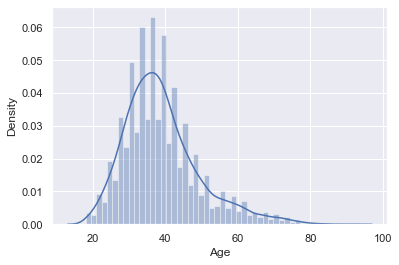

In [3]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

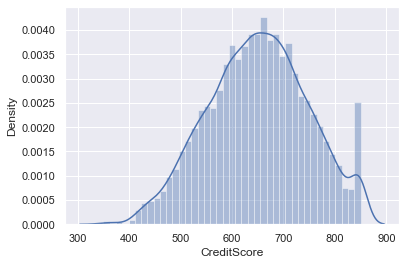

In [4]:
sns.distplot(df['CreditScore'])

<AxesSubplot:xlabel='Balance', ylabel='Density'>

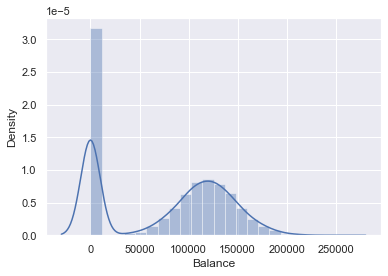

In [5]:
sns.distplot(df['Balance'])

# 3.2 Bi - Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

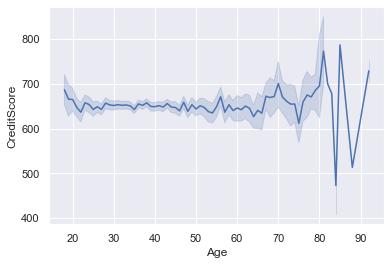

In [6]:
sns.lineplot(x=df['Age'],y=df['CreditScore'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Balance'>

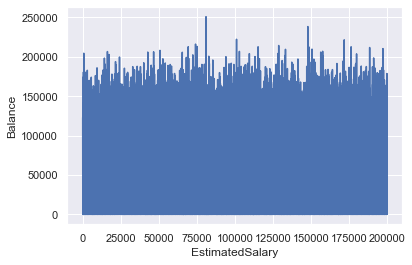

In [7]:
sns.lineplot(x=df['EstimatedSalary'],y=df['Balance'])

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

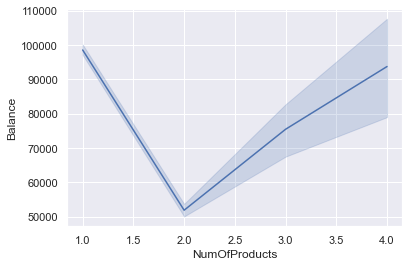

In [8]:
sns.lineplot(x=df['NumOfProducts'],y=df['Balance'])

# 3.3 Multi - Variate Analysis

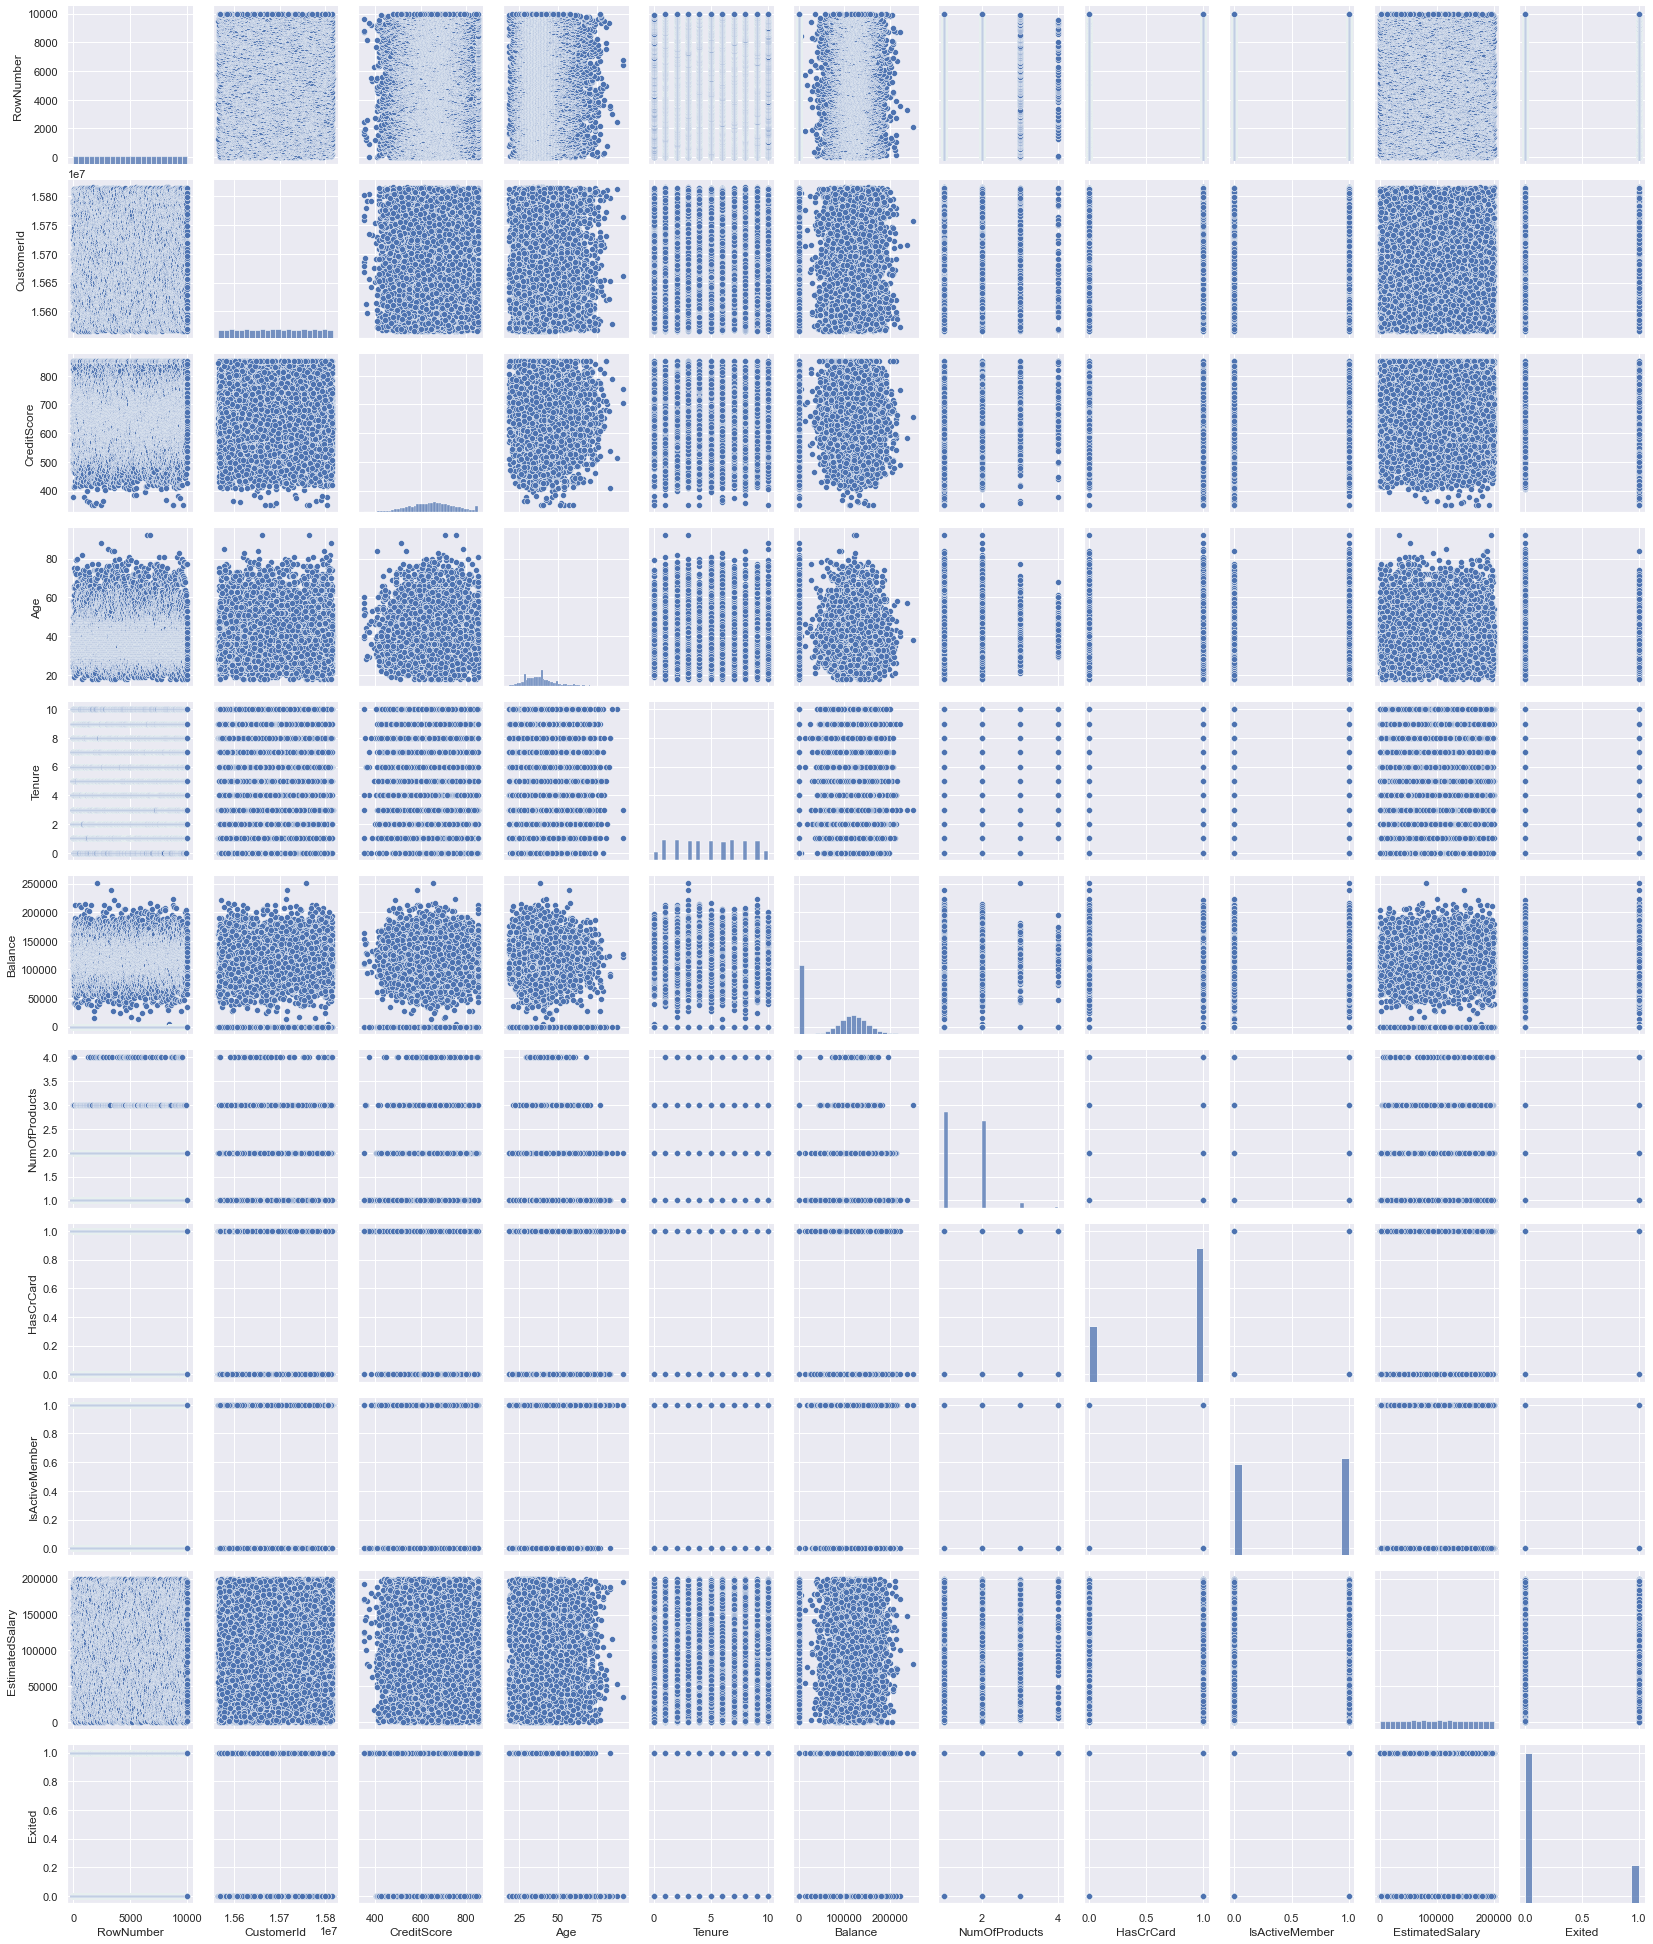

In [9]:
sns.pairplot(data=df,aspect=.85);

In [10]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

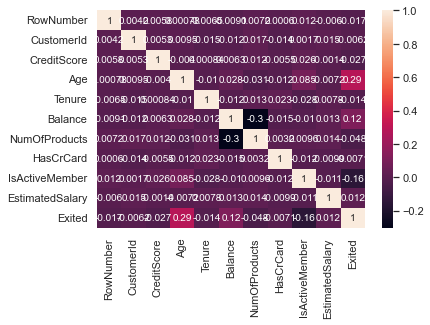

In [11]:
sns.heatmap(df.corr(),annot=True)

# 4. Perform descriptive statistics on the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5.Handle the Missing values.

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='CreditScore'>

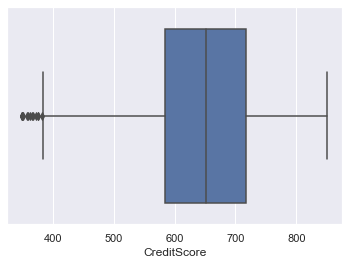

In [15]:
sns.boxplot(x=df['CreditScore'])

In [16]:
Q1= df['CreditScore'].quantile(0.25)
Q2=df['CreditScore'].quantile(0.75)
print(Q1,Q2)

584.0 718.0


In [17]:
IQR=Q2-Q1
IQR

134.0

In [18]:
upper_limit =Q2 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

In [19]:
upper_limit

919.0

In [20]:
lower_limit

383.0

In [21]:
df=df[df['CreditScore']<upper_limit]

In [22]:
df=df[df['CreditScore']>lower_limit]

<AxesSubplot:xlabel='CreditScore'>

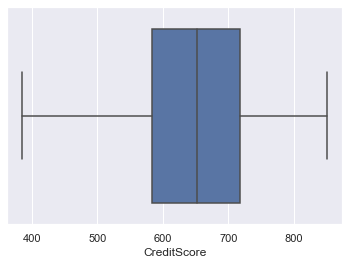

In [23]:
sns.boxplot(x=df['CreditScore'])

In [24]:
p99= df['CreditScore'].quantile(0.99)
p99

850.0

In [25]:
df = df[df['CreditScore']<=p99]

<AxesSubplot:xlabel='CreditScore'>

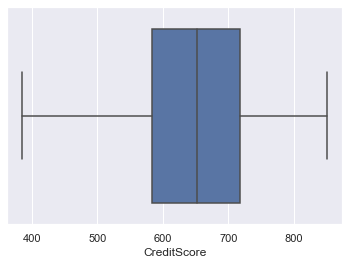

In [26]:
sns.boxplot(x=df['CreditScore'])

In [27]:
df.median()

RowNumber          5.001500e+03
CustomerId         1.569073e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.717329e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001144e+05
Exited             0.000000e+00
dtype: float64

In [28]:
Q1= df['CreditScore'].quantile(0.25)
Q2=df['CreditScore'].quantile(0.75)

In [29]:
IQR=Q2-Q1
IQR

134.0

In [30]:
upper_limit =Q2 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

In [31]:
df['CreditScore'] = np.where(df['CreditScore']>upper_limit,652,df['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

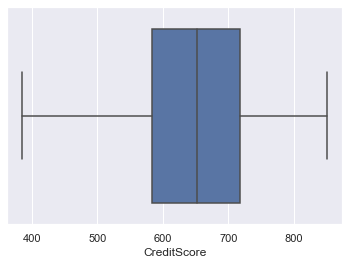

In [32]:
sns.boxplot(x=df['CreditScore'])

In [33]:
df.shape

(9984, 14)

# 7. Check for Categorical columns and perform encoding.


In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
le=LabelEncoder()

In [36]:
df['Gender'] = le.fit_transform(df['Gender'])

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


# 8. Split the data into dependent and independent variables.

In [38]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,0,28,4,130142.79,1,1,0,38190.78,0


In [39]:
X=df.drop(columns=['CreditScore'],axis=1)
X.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [40]:
Y=df['CreditScore']
Y

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 9984, dtype: int64

# 9. Scale the independent variables

In [41]:
X=df.drop(columns=['Surname','Geography','Gender'],axis=1)
X.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [42]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.732885,-0.782659,-0.333109,0.294242,-1.042394,-1.225576,-0.912830,0.646358,0.969418,0.022940,1.984976
1,-1.732538,-0.605976,-0.447651,0.198886,-1.388254,0.117612,-0.912830,-1.547130,0.969418,0.217552,-0.503784
2,-1.732192,-0.995335,-1.551418,0.294242,1.032764,1.333306,2.530198,0.646358,-1.031547,0.241700,1.984976
3,-1.731845,0.145341,0.499922,0.008175,-1.388254,-1.225576,0.808684,-1.547130,-1.031547,-0.107840,-0.503784
4,-1.731499,0.653244,2.072269,0.389597,-1.042394,0.785985,-0.912830,0.646358,0.969418,-0.364151,-0.503784


# 10. Split the data into training and testing

In [43]:
X.shape

(9984, 11)

In [44]:
X_train,X_test,y_train,y_test =train_test_split(X_scaled,Y, test_size=0.3,random_state=0)

In [45]:
X_train

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7707,0.941561,1.338733,0.427032,0.675663,-1.042394,-1.225576,0.808684,0.646358,0.969418,0.103510,-0.503784
4425,-0.196213,-1.702609,-0.187329,0.675663,-0.696534,-1.225576,0.808684,0.646358,-1.031547,0.351562,-0.503784
8436,1.194554,1.414236,1.187173,-0.563957,-0.004815,0.129631,-0.912830,0.646358,0.969418,-0.538786,-0.503784
8935,1.368184,-0.394801,-0.707973,0.866374,-0.696534,0.236831,-0.912830,0.646358,-1.031547,-0.695641,1.984976
5450,0.159016,-1.020317,-1.259857,-0.277891,0.686904,-1.225576,0.808684,0.646358,-1.031547,-0.337464,-0.503784
...,...,...,...,...,...,...,...,...,...,...,...
9225,1.469034,1.511913,-0.707973,-0.659312,0.686904,0.293038,0.808684,0.646358,0.969418,-1.423557,-0.503784
4859,-0.045804,-0.411081,1.072631,-0.182535,0.341045,-1.225576,-0.912830,0.646358,0.969418,0.280126,-0.503784
3264,-0.598576,-0.622936,-0.947470,0.389597,-0.350675,0.299239,0.808684,0.646358,-1.031547,0.402517,1.984976
9845,1.684598,1.493673,-1.114076,-0.087180,1.032764,-1.225576,-0.912830,0.646358,0.969418,-0.031656,-0.503784


In [46]:
X_train.shape

(6988, 11)

In [47]:
y_train.shape

(6988,)

In [48]:
X_test

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
334,-1.616785,0.090942,-1.728437,-0.945378,0.686904,1.693320,-0.912830,0.646358,-1.031547,0.292066,1.984976
7347,0.816798,-1.667603,-0.374761,-0.945378,0.686904,1.071582,0.808684,0.646358,0.969418,0.458405,-0.503784
5797,0.279621,-1.160896,0.291664,-0.563957,1.378624,0.577920,0.808684,0.646358,-1.031547,1.344498,-0.503784
4730,-0.090511,1.162732,-0.458064,-0.659312,0.341045,-1.225576,0.808684,-1.547130,-1.031547,1.669605,-0.503784
4479,-0.177499,1.184864,0.676941,0.484952,0.341045,1.260449,-0.912830,-1.547130,-1.031547,0.588378,-0.503784
...,...,...,...,...,...,...,...,...,...,...,...
8692,1.283275,-1.328348,0.104232,-0.754667,-0.696534,0.955182,0.808684,0.646358,-1.031547,-0.599141,-0.503784
6122,0.392255,0.013548,0.374967,-0.468601,1.378624,0.785402,-0.912830,0.646358,-1.031547,1.719465,-0.503784
5112,0.041877,0.243602,0.270838,-0.373246,-1.734113,-1.225576,0.808684,-1.547130,-1.031547,-0.406690,-0.503784
9441,1.544239,0.454665,-0.124851,0.008175,0.341045,1.187381,-0.912830,0.646358,-1.031547,-1.210318,-0.503784


In [49]:
X_test.shape

(2996, 11)

In [50]:
y_test.shape

(2996,)